In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data = pd.read_csv("data.csv")
data['delta'] = data.apply(lambda row: row.end - row.start, axis=1)
data['speed'] = data.apply(lambda row: 1e9/row.delta, axis=1)
data

,type,size,start,end,delta,speed
0,fifo,524288,1575814665502267,1575814666140353,638086,1567.186868
1,fifo,262144,1575814692060765,1575814692809846,749081,1334.969115
2,fifo,131072,1575814703451300,1575814704132374,681074,1468.269234
3,fifo,655536,1575814714498207,1575814715283188,784981,1273.916184
4,fifo,65536,1575814795671859,1575814796202325,530466,1885.134957
5,fifo,32768,1575814808129528,1575814808650503,520975,1919.477902
6,fifo,16384,1575814815570254,1575814816183178,612924,1631.523647
7,fifo,8192,1575814823648711,1575814824327077,678366,1474.130484
8,fifo,4096,1575814832048212,1575814832705935,657723,1520.396884
9,fifo,2048,1575814842126150,1575814843203860,1077710,927.893404


In [3]:
fifo = data.loc[data['type']=='fifo']
fifo = fifo.sort_values('size')
fifo

,type,size,start,end,delta,speed
13,fifo,128,1575814895405240,1575814906186406,10781166,92.754346
12,fifo,256,1575814881511377,1575814887066212,5554835,180.023349
11,fifo,512,1575814868647096,1575814871839425,3192329,313.250921
10,fifo,1024,1575814856163761,1575814858231751,2067990,483.561333
9,fifo,2048,1575814842126150,1575814843203860,1077710,927.893404
8,fifo,4096,1575814832048212,1575814832705935,657723,1520.396884
7,fifo,8192,1575814823648711,1575814824327077,678366,1474.130484
6,fifo,16384,1575814815570254,1575814816183178,612924,1631.523647
5,fifo,32768,1575814808129528,1575814808650503,520975,1919.477902
4,fifo,65536,1575814795671859,1575814796202325,530466,1885.134957


In [4]:
msg = data.loc[data['type']=='msg']
msg = msg.sort_values('size')
msg

,type,size,start,end,delta,speed
24,msg,128,1576182165601469,1576182171682344,6080875,164.450017
25,msg,256,1576182189848627,1576182193577694,3729067,268.163592
26,msg,512,1576182209592940,1576182211323762,1730822,577.760163
27,msg,1024,1576182220134399,1576182221238283,1103884,905.892286
28,msg,2048,1576182231465919,1576182232165616,699697,1429.190064
29,msg,4096,1576182239397927,1576182240067165,669238,1494.236729
30,msg,8192,1576182250628364,1576182251188670,560306,1784.739053


In [5]:
shm = data.loc[data['type']=='shm']
shm = shm.sort_values('size')
shm

,type,size,start,end,delta,speed
32,shm,128,1576183486602631,1576183528331753,41729122,23.964080
33,shm,256,1576183543676351,1576183570066456,26390105,37.892991
34,shm,512,1576183590052176,1576183602215993,12163817,82.211036
35,shm,1024,1576183618962620,1576183628789091,9826471,101.765934
36,shm,2048,1576183640624983,1576183645756329,5131346,194.880641
37,shm,4096,1576183655141068,1576183658107929,2966861,337.056573
38,shm,8192,1576183672899566,1576183674661755,1762189,567.476020
39,shm,16384,1576183683909189,1576183685076373,1167184,856.762944
40,shm,32768,1576183700433019,1576183701240413,807394,1238.552677
41,shm,65536,1576183733009009,1576183733664668,655659,1525.183060


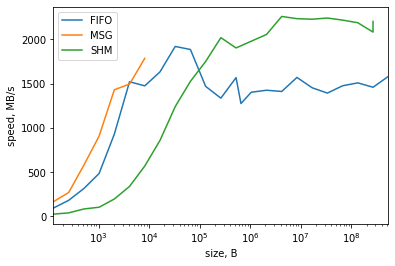

In [9]:
ax = fifo.plot(x='size', y='speed', logx = True, label = "FIFO")
msg.plot(x='size', y='speed', logx = True, ax = ax, label = "MSG")
shm.plot(x='size', y='speed', logx = True, ax = ax, label = "SHM")
plt.legend(loc="best")
plt.xlabel("size, B")
plt.ylabel("speed, MB/s")
plt.savefig("plot.png", dpi=300)
plt.show()